In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from tqdm import tqdm

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

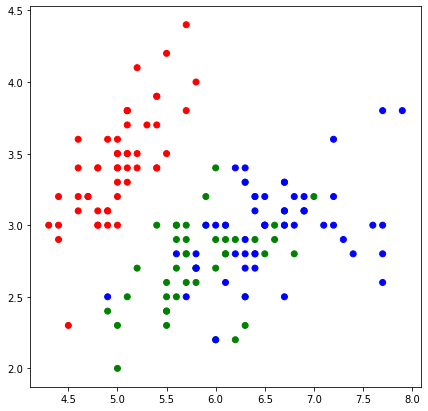

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
def knn(x_train, y_train, x_test, k):
    
    answers = [[], []]
    for x in x_test:
        test_distances_start = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances_start.append((distance, y_train[i]))
            
        test_distances = sorted(test_distances_start)[0:k]
#         print('Список расстояний', test_distances)
       
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # создаем список весов
        weights_list = []
        
        # Считаем веса для каждого соседа в зависимости от его расстояния и порядкового номера
        for m in range(len(test_distances)):
            weight = 1/(((test_distances)[m][0]+1e-4)**(m))
            weights_list.append(weight)
#         print('Список весов', weights_list)
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in test_distances:
            classes[d[1]] += 1
        
        # тепрь найдем вероятности классов
        classes_probability = {}
        for n in classes.keys():
            classes_probability[n] = (classes[n]/sum(list(classes.values())))
#         print('Вероятности классов', classes_probability)
        
        
        # Теперь найдем вероятность что это именно этот класс, умноженный на вес этого соседа
        weighted_probability = []
        for l in range(len(test_distances)):
            weighted_probability.append((weights_list[l]*classes_probability[test_distances[l][1]], test_distances[l][1]))
            
#         print('Взвешенные вероятности', weighted_probability)
        
        # Найдем теперь сумму вероятностей по каждому классу
        classes_weighted_probability = {class_item: 0 for class_item in set(y_train)}
        for z in range(len(weighted_probability)):
            classes_weighted_probability[weighted_probability[z][1]] += weighted_probability[z][0]
    
        
#         print('Суммарная вероятность по классам', classes_weighted_probability)
        
#         print('Предсказанный класс', sorted(classes_weighted_probability, key=classes_weighted_probability.get)[-1])
      
            
#         Записываем в список ответов класс с наибольшей вероятностью
        answers[0].append(sorted(classes_weighted_probability, key=classes_weighted_probability.get)[-1])
        answers[1].append(x)
    return answers

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [8]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)[0]

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667


In [9]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [10]:
# get_graph(X_train, y_train, k)

In [11]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)[0]

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.800


In [12]:
# get_graph(X_train, y_train, k)

In [13]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)[0]

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.833


In [14]:
# get_graph(X_train, y_train, k)

In [15]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)[0]

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.767


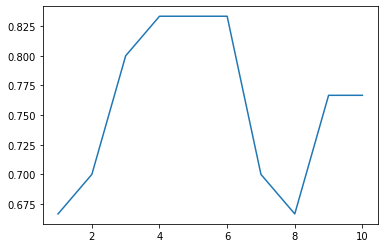

In [16]:
preds_acc = []
for n in range (1, 11):
    y_pred = knn(X_train, y_train, X_test, n)[0]
    preds_acc.append(accuracy(y_pred, y_test))

plt.plot([1 + i for i in range(10)], preds_acc)

# Задание 2

Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить 
график ее зависимости от k (взять от 1 до 10) для выборки данных из данного урока

In [17]:
def compute_std(array):
    mean = np.mean(array, axis=0)
    D = np.sum(np.square(array - mean))
    std = np.sqrt(D)
    return std

In [18]:
def compute_classes_std(y_pred):
    # для начала надо распределить точки по классам
    classes = {class_item: 0 for class_item in set(y_pred[0])}
    for class_ in classes.keys():
        points_list = []
        for i in range(len(y_pred[0])):
            if y_pred[0][i] == class_:
                points_list.append(y_pred[1][i])
        classes[class_] = points_list
    # Затем для точек каждого класса посчитать среднеквадратичное отклонение
    classes_std = {}
    for i in classes.keys():
        classes_std[i] = compute_std(np.array(classes[i]))
    return classes_std

In [19]:
stds_list = []
for k in range(1,11):
    stds_list.append(compute_classes_std(knn(X_train, y_train, X_test, k)))

In [20]:
std_lines = {}
for class_ in stds_list[0].keys():
    lines = []
    for i in range(len(stds_list)):
        lines.append(stds_list[i][class_])
    std_lines[class_] = lines

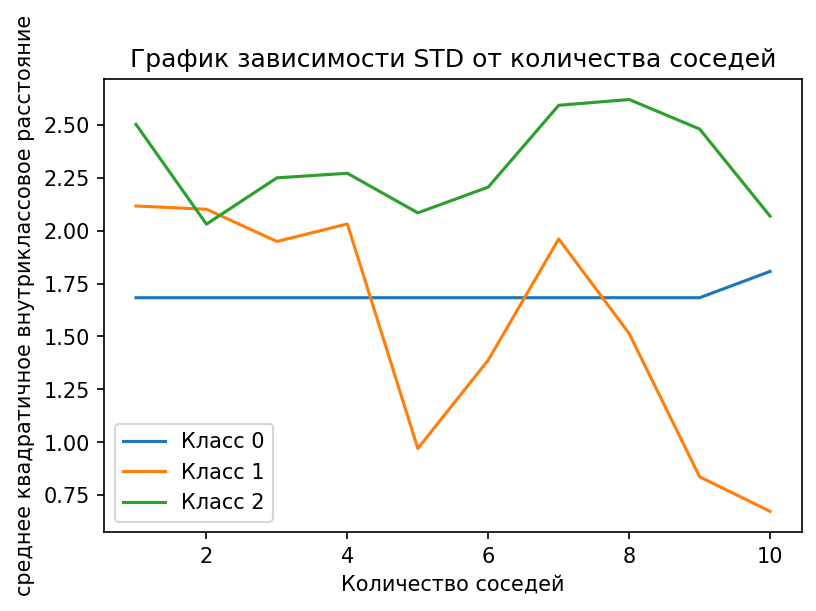

In [21]:
plt.subplots(dpi=150)
for key in std_lines.keys():
    plt.plot([1 + i for i in range(10)], list(std_lines[key]))
plt.xlabel('Количество соседей')
plt.ylabel('среднее квадратичное внутриклассовое расстояние')
plt.legend(['Класс 0', 'Класс 1', 'Класс 2'])
plt.title('График зависимости STD от количества соседей');